In [10]:
import pandas as pd
import numpy as np
import csv
import math
import os
import re
import datetime
import matplotlib.pyplot as plt
import yaml
import mysql.connector

In [11]:
# Get All Files
file_list = [f"mrtssales_{i}.csv" for i in range(1992,2021,1)]
data_path = "raw_data"
# Get full path to all original files
file_list = [os.path.join(data_path, file) for file in file_list]
# Initialize empty list to save the trimmed files
file_trim_list = list()

# Trim File
for file in file_list:
    with open(file,'r') as csv_file:
        # read line of files
        csv_reader = csv.reader(csv_file, delimiter=',')
        # store headers and rows
        for i in range(4):
            next(csv_reader)
        # New Clean File
        file_trim = file.replace('.csv','_trim.csv').replace('raw_data','clean_data')
        file_trim_list.append(file_trim)
        with open(file_trim,'w') as csv_write:
            # create the csv writer
            writer = csv.writer(csv_write,lineterminator='\n')
            # loop through data
            
            for row in csv_reader:
                if "ADJUSTED(2)" in row:
                    break
                elif "NOT ADJUSTED" in row:
                    continue
                else:
                    # write a row to the csv file
                    writer.writerow(row)
file_trim_list[0]

'clean_data\\mrtssales_1992_trim.csv'

In [12]:
# Init list to save the raw dataframes for each trimmed file
df_raw_list = list()
# Columns to be removed
remove_column = ['Unnamed: 0','Unnamed: 15','Unnamed: 16', 'TOTAL']

# For each Trimmed File
for file in file_trim_list:
    # Read DataFrame
    df_raw = pd.read_csv(file)
#     print(df_raw.shape)
    # Remove Unncessary Columns
    rem_col = list(set(df_raw.columns) & set(remove_column))
    df_raw = df_raw.drop(rem_col,axis=1)
    # Rename Columns
    df_raw.rename(columns = {'Unnamed: 1':'Kind'}, inplace = True)
    # Remove ",","'","(S)"
    df_raw.replace(',','', regex=True, inplace=True)
    df_raw.replace("'","", regex=True, inplace=True)
    df_raw.replace('(S)', np.nan, inplace=True)
    df_raw = df_raw.reset_index(drop=True).T
    df_raw.columns = df_raw.iloc[0,:]
    df_raw = df_raw.drop('Kind',axis=0)
    df_raw['Date'] =  pd.to_datetime(df_raw.index)
    df_raw.reset_index(drop=True, inplace=True)
    df_raw_list.append(df_raw)
    
# Concatenate all DataFrames
df = df_raw_list[0]
for d in df_raw_list[1:]:
    df = pd.concat([df, d], axis=0)

# Generate Camel Case
df.columns = [col.title().replace(' ','').replace('(','').replace(')','').replace('-','').replace('.','') for col in df.columns]

# Remove NaN
df.replace('(NA)', np.nan, inplace=True)
# Reset Index
df.reset_index(drop=True,inplace=True)
    
# Save CSV
df.to_csv(os.path.join('','data_agg.csv'),index=False)
df.isnull().sum()

# display(df)

ind = list(range(len(df.columns)-1))
ind.insert(0, len(df.columns)-1)
df = df.iloc[:,ind]
display(df)
display(df.isnull().sum())



,Date,RetailAndFoodServicesSalesTotal,RetailSalesAndFoodServicesExclMotorVehicleAndParts,RetailSalesAndFoodServicesExclGasolineStations,RetailSalesAndFoodServicesExclMotorVehicleAndPartsAndGasolineStations,RetailSalesTotal,RetailSalesTotalExclMotorVehicleAndPartsDealers,Gafo1,MotorVehicleAndPartsDealers,AutomobileAndOtherMotorVehicleDealers,...,GiftNoveltyAndSouvenirStores,UsedMerchandiseStores,NonstoreRetailers,ElectronicShoppingAndMailOrderHouses,FuelDealers,FoodServicesAndDrinkingPlaces,DrinkingPlaces,RestaurantsAndOtherEatingPlaces,FullServiceRestaurants,LimitedServiceEatingPlaces
0,1992-01-01,146376,116565,134277,104466,130683,100872,33906,29811,26788,...,658,371,6860,2692,1916,15693,1049,13325,6887,6438
1,1992-02-01,147079,115862,135499,104282,131244,100027,35220,31217,28203,...,798,402,6059,2285,1627,15835,1026,13474,6937,6537
2,1992-03-01,159336,124200,147064,111928,142488,107352,38731,35136,31684,...,714,419,6297,2484,1537,16848,1074,14346,7245,7101
3,1992-04-01,163669,127587,151226,115144,147175,111093,40548,36082,32547,...,801,393,6022,2506,1341,16494,1031,14065,7000,7065
4,1992-05-01,170068,133608,156619,120159,152420,115960,42213,36460,32883,...,900,435,5803,2483,1163,17648,1047,15077,7532,7545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,545307,429379,506577,390649,488949,373021,109556,115928,106956,...,1105,1491,77168,70505,1630,56358,NaN,52457,NaN,30013
344,2020-09-01,530987,417929,493756,380698,476247,363189,104834,113058,104451,...,1185,1357,75540,68425,1885,54740,NaN,50423,NaN,28743
345,2020-10-01,553114,438435,514953,400274,495722,381043,111528,114679,105948,...,1801,1607,81386,73023,2262,57392,NaN,52829,NaN,29950
346,2020-11-01,543273,440053,508879,405659,492362,389142,117962,103220,95304,...,1136,1537,91542,83769,2563,50911,NaN,46984,NaN,27249


Date                                                                      0
RetailAndFoodServicesSalesTotal                                           0
RetailSalesAndFoodServicesExclMotorVehicleAndParts                        0
RetailSalesAndFoodServicesExclGasolineStations                            0
RetailSalesAndFoodServicesExclMotorVehicleAndPartsAndGasolineStations     0
                                                                         ..
FoodServicesAndDrinkingPlaces                                             0
DrinkingPlaces                                                           34
RestaurantsAndOtherEatingPlaces                                           0
FullServiceRestaurants                                                   11
LimitedServiceEatingPlaces                                                0
Length: 66, dtype: int64

In [13]:
df.columns

Index(['Date', 'RetailAndFoodServicesSalesTotal',
       'RetailSalesAndFoodServicesExclMotorVehicleAndParts',
       'RetailSalesAndFoodServicesExclGasolineStations',
       'RetailSalesAndFoodServicesExclMotorVehicleAndPartsAndGasolineStations',
       'RetailSalesTotal', 'RetailSalesTotalExclMotorVehicleAndPartsDealers',
       'Gafo1', 'MotorVehicleAndPartsDealers',
       'AutomobileAndOtherMotorVehicleDealers', 'AutomobileDealers',
       'NewCarDealers', 'UsedCarDealers', 'AutomotivePartsAccAndTireStores',
       'FurnitureHomeFurnElectronicsAndApplianceStores',
       'FurnitureAndHomeFurnishingsStores', 'FurnitureStores',
       'HomeFurnishingsStores', 'FloorCoveringStores',
       'AllOtherHomeFurnishingsStores', 'ElectronicsAndApplianceStores',
       'HouseholdApplianceStores', 'ElectronicsStores',
       'BuildingMatAndGardenEquipAndSuppliesDealers',
       'BuildingMatAndSuppliesDealers', 'PaintAndWallpaperStores',
       'HardwareStores', 'FoodAndBeverageStores', 'Groce

In [14]:
df

,Date,RetailAndFoodServicesSalesTotal,RetailSalesAndFoodServicesExclMotorVehicleAndParts,RetailSalesAndFoodServicesExclGasolineStations,RetailSalesAndFoodServicesExclMotorVehicleAndPartsAndGasolineStations,RetailSalesTotal,RetailSalesTotalExclMotorVehicleAndPartsDealers,Gafo1,MotorVehicleAndPartsDealers,AutomobileAndOtherMotorVehicleDealers,...,GiftNoveltyAndSouvenirStores,UsedMerchandiseStores,NonstoreRetailers,ElectronicShoppingAndMailOrderHouses,FuelDealers,FoodServicesAndDrinkingPlaces,DrinkingPlaces,RestaurantsAndOtherEatingPlaces,FullServiceRestaurants,LimitedServiceEatingPlaces
0,1992-01-01,146376,116565,134277,104466,130683,100872,33906,29811,26788,...,658,371,6860,2692,1916,15693,1049,13325,6887,6438
1,1992-02-01,147079,115862,135499,104282,131244,100027,35220,31217,28203,...,798,402,6059,2285,1627,15835,1026,13474,6937,6537
2,1992-03-01,159336,124200,147064,111928,142488,107352,38731,35136,31684,...,714,419,6297,2484,1537,16848,1074,14346,7245,7101
3,1992-04-01,163669,127587,151226,115144,147175,111093,40548,36082,32547,...,801,393,6022,2506,1341,16494,1031,14065,7000,7065
4,1992-05-01,170068,133608,156619,120159,152420,115960,42213,36460,32883,...,900,435,5803,2483,1163,17648,1047,15077,7532,7545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2020-08-01,545307,429379,506577,390649,488949,373021,109556,115928,106956,...,1105,1491,77168,70505,1630,56358,NaN,52457,NaN,30013
344,2020-09-01,530987,417929,493756,380698,476247,363189,104834,113058,104451,...,1185,1357,75540,68425,1885,54740,NaN,50423,NaN,28743
345,2020-10-01,553114,438435,514953,400274,495722,381043,111528,114679,105948,...,1801,1607,81386,73023,2262,57392,NaN,52829,NaN,29950
346,2020-11-01,543273,440053,508879,405659,492362,389142,117962,103220,95304,...,1136,1537,91542,83769,2563,50911,NaN,46984,NaN,27249


=== Python MySQL Script ===
=== Send Query
=== Print Function
=== Send Query
=== Print Function
=== Send Query
=== Print Function


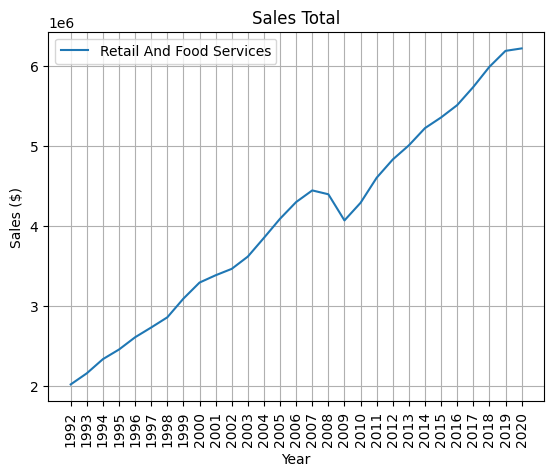

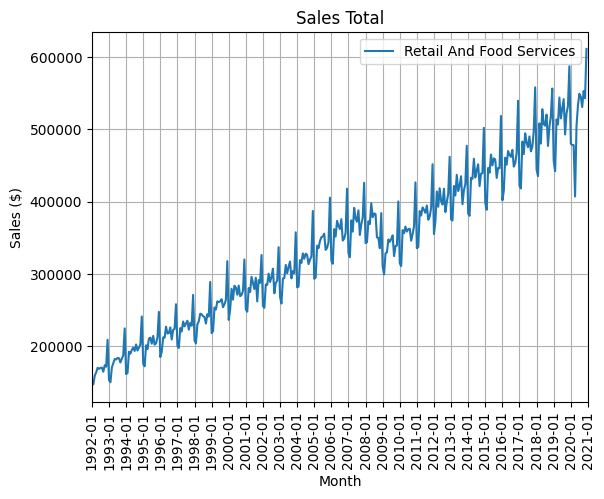

In [15]:
def print_response (): 
    print('=== Print Function')
    # Print all the rows
    for row in cursor.fetchall():
        print(row)

def send_query(query):
    print('=== Send Query')
    # Query Execution
    cursor.execute(query)
    # print response
    print_response()
        
print('=== Python MySQL Script ===')

# Credentials
db = yaml.safe_load(open('credentials.yaml'))
config = {
    'user':     db['database']['user'],
    'password': db['database']['pwrd'],
    'host':     db['database']['host'],
    'database': db['database']['db'],
    'auth_plugin': 'mysql_native_password'
}

# Set Up DB Connection
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Query Definition
# query = ("UPDATE students SET BirthDate = DATE_ADD(`BirthDate`, INTERVAL 1 DAY) WHERE CollegeID>5;")
query_cmd = ("DROP SCHEMA IF EXISTS mrtssales;")
send_query(query_cmd)

query_cmd = ("CREATE SCHEMA mrtssales;")
send_query(query_cmd)

query_cmd = ("USE mrtssales;")
send_query(query_cmd)

# Create Table
query_cmd = "CREATE TABLE sales (sales_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT, date DATE NOT NULL,"
for name in df.columns[1:]:
    query_cmd = query_cmd + name[:60] + ' INT,'
query_cmd = query_cmd + "PRIMARY KEY  (sales_id)) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4;"
cursor.execute(query_cmd)

# Insert Values
for i in range(0,len(df)): 
    # CMD
    query_cmd = "INSERT INTO `sales` VALUES("+ str(i+1)+",'"+str(df.loc[i,'Date'])+"'"
    for j in df.columns[1:]:
        # Check if Float (NaN)
        if isinstance(df.loc[i,j],float):
            query_cmd = query_cmd + "," + "NULL"
        else:
            query_cmd = query_cmd + "," + str(int(df.loc[i,j]))
    query_cmd = query_cmd + ");"
    cursor.execute(query_cmd)

# Check Database
query_cmd = """
SELECT 
    DATE_FORMAT(Date,'%Y') as year,
    CAST(SUM(RetailAndFoodServicesSalesTotal) as UNSIGNED) as sales
FROM sales
GROUP BY year;
"""
cursor.execute(query_cmd)
year1 = []
sales1 = []
# Save Month and Sales
for row in cursor.fetchall():
#     print(row)
    year1.append(row[0])
    sales1.append(row[1])

# Check Database
query_cmd = """
SELECT 
    DATE_FORMAT(Date,'%Y-%m') as month,
    CAST(RetailAndFoodServicesSalesTotal as UNSIGNED) as sales
FROM sales;
"""
cursor.execute(query_cmd)
month2 = []
sales2 = []
# Save Month and Sales
for row in cursor.fetchall():
#     print(row)
    month2.append(row[0])
    sales2.append(row[1])

# Close Connection
cursor.close()
cnx.close()

# Plotting Year
plt.plot(year1,sales1,label='Retail And Food Services')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.title('Sales Total')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','total_sales_retail_and_food_year.png'))
plt.show()

# Plot Month
plt.plot(month2,sales2,label='Retail And Food Services')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.title('Sales Total')
plt.xticks(rotation = 90)
plt.legend()
plt.xticks([f'{i}-01' for i in range(1992,2022)])
plt.xlim(['1992-01','2021-01'])
plt.savefig(os.path.join('fig','total_sales_retail_and_food_month.png'))
plt.show()

In [16]:
type(month2[0])

str

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


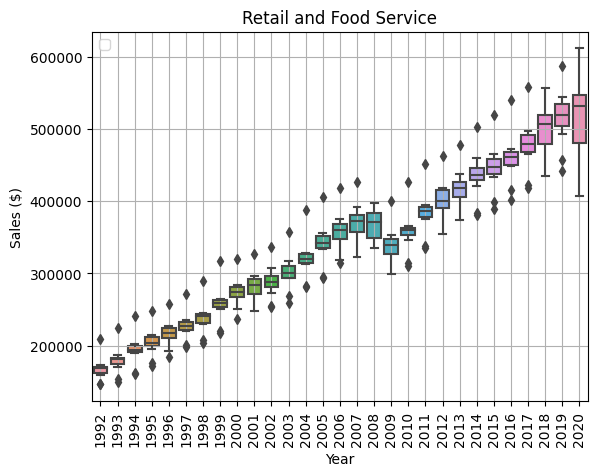

In [17]:
# import library
import seaborn as sns

# Trends
# year1,sales1
# month2,sales2

# Prepare data
dat = pd.DataFrame()
dat['value'] = sales2
dat['date'] = [datetime.datetime.strptime(d, "%Y-%m") for d in month2]
dat['year'] = [d.year for d in dat['date']]
dat['month'] = [d.strftime('%b') for d in dat['date']]
years = dat['year'].unique()

# 
sns.boxplot(x='year', y='value', data=dat)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.title('Retail and Food Service')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','trend.png'))
plt.show()

# # Draw Plot
# fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
# sns.boxplot(x='year', y='value', data=dat, ax=axes[0])
# sns.boxplot(x='month', y='value', data=dat.loc[~dat.year.isin([1991, 2008]), :])

# # Set Title
# axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
# axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
# plt.grid()
# plt.show()


=== Send Query
=== Print Function
=== Send Query
=== Print Function
=== Send Query
=== Print Function


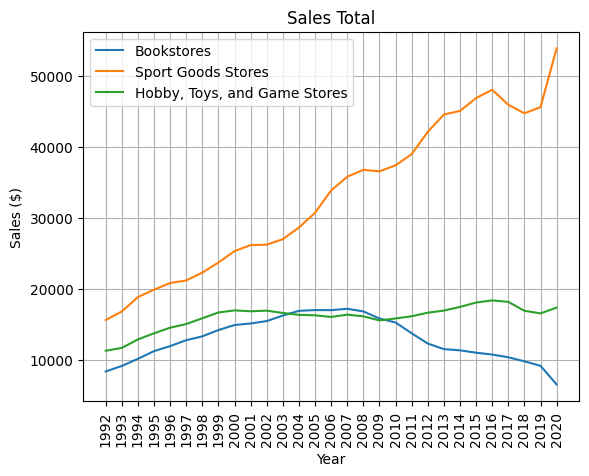

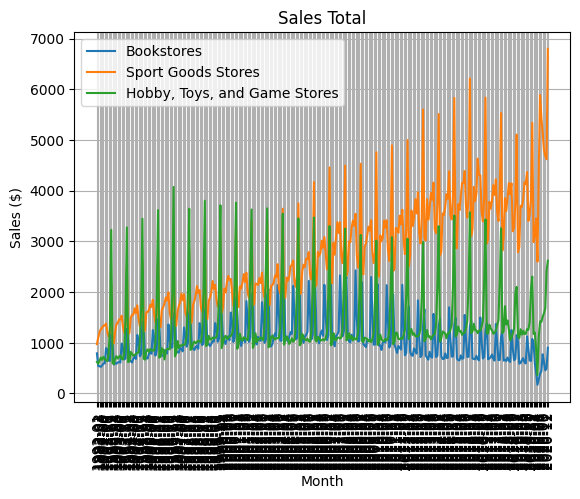

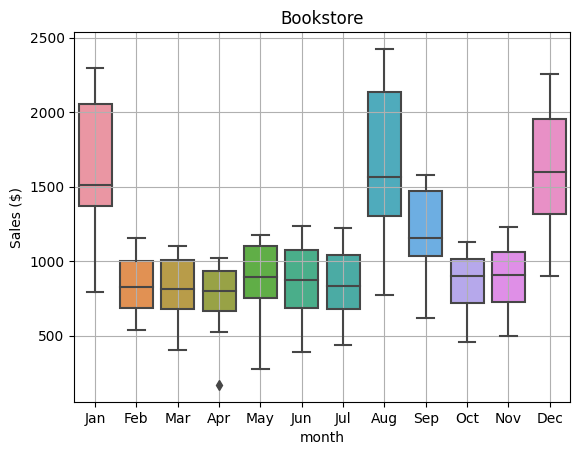

,year,men,women
date,,,
1992-01-01,1992,10179,31815
1993-01-01,1993,9962,32350
1994-01-01,1994,10032,30585
1995-01-01,1995,9315,28696
1996-01-01,1996,9546,28238
1997-01-01,1997,10069,27822
1998-01-01,1998,10196,28332
1999-01-01,1999,9667,29549
2000-01-01,2000,9507,31447


,year,men,women
date,,,
1992-01-01,NaN,NaN,NaN
1993-01-01,0.000502,-0.021318,0.016816
1994-01-01,0.000502,0.007027,-0.054560
1995-01-01,0.000502,-0.071471,-0.061762
1996-01-01,0.000501,0.024799,-0.015960
1997-01-01,0.000501,0.054787,-0.014732
1998-01-01,0.000501,0.012613,0.018331
1999-01-01,0.000501,-0.051883,0.042955
2000-01-01,0.000500,-0.016551,0.064232


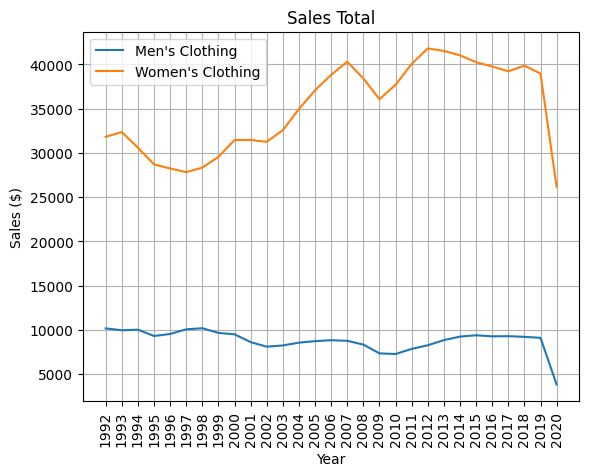

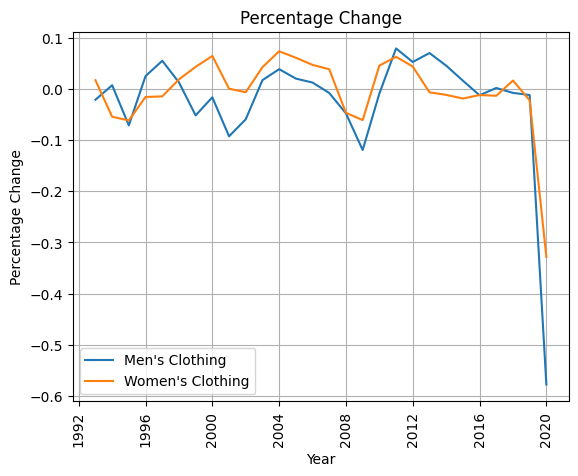

C:\Users\willy\AppData\Local\Temp\ipykernel_304\201423225.py:204: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = data.groupby('year').aggregate('sum')


,RetailAndFoodServicesSalesTotal,RetailSalesAndFoodServicesExclMotorVehicleAndParts,RetailSalesAndFoodServicesExclGasolineStations,RetailSalesAndFoodServicesExclMotorVehicleAndPartsAndGasolineStations,RetailSalesTotal,RetailSalesTotalExclMotorVehicleAndPartsDealers,Gafo1,MotorVehicleAndPartsDealers,AutomobileAndOtherMotorVehicleDealers,AutomobileDealers,...,GiftNoveltyAndSouvenirStores,UsedMerchandiseStores,NonstoreRetailers,ElectronicShoppingAndMailOrderHouses,FuelDealers,FoodServicesAndDrinkingPlaces,DrinkingPlaces,RestaurantsAndOtherEatingPlaces,FullServiceRestaurants,LimitedServiceEatingPlaces
year,,,,,,,,,,,,,,,,,,,,,
1992,2014102,1595709,1857778,1439385,1811237,1392844,533388,418393,376470,358444,...,12232,5567,78501,35210,16665,202865,12281.0,173468,86208.0,87260
1993,2153095,1680179,1990719,1517803,1937628,1464712,570782,472916,428106,407126,...,12749,6136,85811,40677,17566,215467,12141.0,185719,91122.0,94597
1994,2330235,1789094,2159013,1617872,2105235,1564094,616347,541141,491901,468100,...,13908,6125,96280,47037,18700,225000,11762.0,195025,96683.0,98342
1995,2450628,1870913,2269515,1689800,2217616,1637901,650040,579715,527812,501684,...,14503,6617,103516,52680,19820,233012,12452.0,202050,99032.0,103018
1996,2603794,1976287,2409369,1781862,2361549,1734042,682613,627507,571943,543949,...,15297,7256,117761,61106,22563,242245,12949.0,210149,104113.0,106036
1997,2726131,2072314,2526431,1872614,2468767,1814950,713387,653817,595273,564658,...,16333,8058,126190,70067,21941,257364,13379.0,223308,114186.0,109122
1998,2852956,2164541,2661229,1972814,2581762,1893347,757936,688415,628416,593501,...,17598,9023,133904,80297,18925,271194,13957.0,234940,119432.0,115508
1999,3086990,2322786,2874466,2110262,2803090,2038886,815665,764204,701555,661820,...,18406,9377,151797,94282,19912,283900,14530.0,244761,125108.0,119653
2000,3287537,2491327,3037721,2241511,2983276,2187066,862739,796210,732771,687782,...,18905,9832,180453,113790,26692,304261,15330.0,261098,133579.0,127519


,RetailAndFoodServicesSalesTotal,RetailSalesAndFoodServicesExclGasolineStations,RetailSalesTotal,RetailSalesAndFoodServicesExclMotorVehicleAndParts,RetailSalesAndFoodServicesExclMotorVehicleAndPartsAndGasolineStations,RetailSalesTotalExclMotorVehicleAndPartsDealers,Gafo1,MotorVehicleAndPartsDealers,AutomobileAndOtherMotorVehicleDealers,AutomobileDealers,...,HobbyToyAndGameStores,UsedMerchandiseStores,PaintAndWallpaperStores,OtherClothingStores,GiftNoveltyAndSouvenirStores,OfficeSuppliesAndStationeryStores,BookStores,MensClothingStores,DrinkingPlaces,FloorCoveringStores
year,,,,,,,,,,,,,,,,,,,,,
1992,2014102,1857778,1811237,1595709,1439385,1392844,533388,418393,376470,358444,...,11251,5567,0.0,0.0,12232,9184,8327,10179.0,12281.0,10597.0
1993,2153095,1990719,1937628,1680179,1517803,1464712,570782,472916,428106,407126,...,11651,6136,0.0,0.0,12749,11127,9108,9962.0,12141.0,11460.0
1994,2330235,2159013,2105235,1789094,1617872,1564094,616347,541141,491901,468100,...,12850,6125,0.0,0.0,13908,13235,10107,10032.0,11762.0,12765.0
1995,2450628,2269515,2217616,1870913,1689800,1637901,650040,579715,527812,501684,...,13714,6617,0.0,0.0,14503,14824,11196,9315.0,12452.0,13704.0
1996,2603794,2409369,2361549,1976287,1781862,1734042,682613,627507,571943,543949,...,14502,7256,0.0,0.0,15297,15592,11905,9546.0,12949.0,14639.0
1997,2726131,2526431,2468767,2072314,1872614,1814950,713387,653817,595273,564658,...,15021,8058,0.0,0.0,16333,17334,12742,10069.0,13379.0,16050.0
1998,2852956,2661229,2581762,2164541,1972814,1893347,757936,688415,628416,593501,...,15833,9023,0.0,0.0,17598,19522,13282,10196.0,13957.0,16961.0
1999,3086990,2874466,2803090,2322786,2110262,2038886,815665,764204,701555,661820,...,16651,9377,0.0,0.0,18406,21600,14172,9667.0,14530.0,18409.0
2000,3287537,3037721,2983276,2491327,2241511,2187066,862739,796210,732771,687782,...,16947,9832,0.0,0.0,18905,22748,14879,9507.0,15330.0,19519.0


ValueError: x and y must have same first dimension, but have shapes (348,) and (29,)

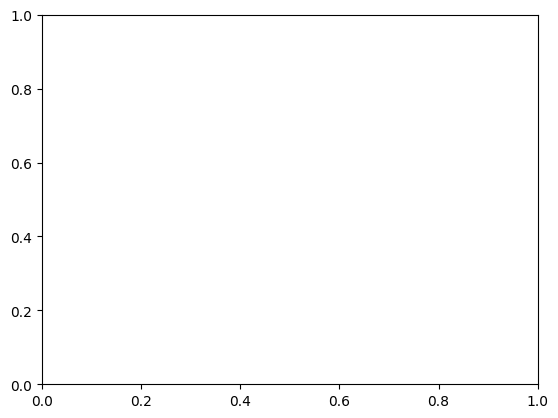

In [18]:
# Credentials
db = yaml.safe_load(open('credentials.yaml'))
config = {
    'user':     db['database']['user'],
    'password': db['database']['pwrd'],
    'host':     db['database']['host'],
    'database': db['database']['db'],
    'auth_plugin': 'mysql_native_password'
}

# Set Up DB Connection
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

query_cmd = ("DROP SCHEMA IF EXISTS mrtssales;")
send_query(query_cmd)

query_cmd = ("CREATE SCHEMA mrtssales;")
send_query(query_cmd)

query_cmd = ("USE mrtssales;")
send_query(query_cmd)

# Kind of Business
query_cmd = "CREATE TABLE sales (sales_id SMALLINT UNSIGNED NOT NULL AUTO_INCREMENT, date DATE NOT NULL,"
for name in df.columns[1:]:
    query_cmd = query_cmd + name[:60] + ' INT,'
query_cmd = query_cmd + "PRIMARY KEY  (sales_id)) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4;"
cursor.execute(query_cmd)

# Insert Values
for i in range(0,len(df)): 
    # CMD
    query_cmd = "INSERT INTO `sales` VALUES("+ str(i+1)+",'"+str(df.loc[i,'Date'])+"'"
    for j in df.columns[1:]:
        # Check if Float (NaN)
        if isinstance(df.loc[i,j],float):
            query_cmd = query_cmd + "," + "NULL"
        else:
            query_cmd = query_cmd + "," + str(int(df.loc[i,j]))
    query_cmd = query_cmd + ");"
    cursor.execute(query_cmd)

# Check Database
query_cmd = """
SELECT 
    DATE_FORMAT(Date,'%Y') as year,
    CAST(SUM(Bookstores) as UNSIGNED) as bookstores,
    CAST(SUM(SportingGoodsStores) as UNSIGNED) as sporting,
    CAST(SUM(HobbyToyAndGameStores) as UNSIGNED) as hobbies
FROM sales
GROUP BY year;
"""
cursor.execute(query_cmd)
year3 = []
book = []
sport = []
hobby = []
# Save Year and Sales
for row in cursor.fetchall():
    # print(row)
    year3.append(row[0])
    book.append(row[1])
    sport.append(row[2])
    hobby.append(row[3])

# Plotting Year
plt.plot(year3,book,label='Bookstores')
plt.plot(year3,sport,label='Sport Goods Stores')
plt.plot(year3,hobby,label='Hobby, Toys, and Game Stores')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.title('Sales Total')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','book_sport_hobby_year.png'))
plt.show()

# Check Database
query_cmd = """
SELECT 
    DATE_FORMAT(Date,'%Y-%m') as month,
    CAST(Bookstores as UNSIGNED) as bookstores,
    CAST(SportingGoodsStores as UNSIGNED) as sporting,
    CAST(HobbyToyAndGameStores as UNSIGNED) as hobbies
FROM sales
GROUP BY month;
"""
cursor.execute(query_cmd)
month = []
book = []
sport = []
hobby = []
# Save Year and Sales
for row in cursor.fetchall():
    # print(row)
    month.append(row[0])
    book.append(row[1])
    sport.append(row[2])
    hobby.append(row[3])

# Plotting Year
plt.plot(month,book,label='Bookstores')
plt.plot(month,sport,label='Sport Goods Stores')
plt.plot(month,hobby,label='Hobby, Toys, and Game Stores')
plt.grid()
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.title('Sales Total')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','book_sport_hobby_month.png'))
plt.show()

dat = pd.DataFrame()
dat['date'] = [datetime.datetime.strptime(d, "%Y-%m") for d in month2]
dat['year'] = [d.year for d in dat['date']]
dat['month'] = [d.strftime('%b') for d in dat['date']]
dat['book'] = book
dat['sport'] = sport
dat['hobby'] = hobby

# Box Plot
sns.boxplot(x='month', y='book', data=dat)
plt.title('Bookstore')
plt.ylabel('Sales ($)')
plt.grid()
plt.savefig(os.path.join('fig','box_plot_seasonal.png'))
plt.show()

#======= Percentage Change
# Check Database
query_cmd = """
SELECT 
    DATE_FORMAT(Date,'%Y') as year,
    CAST(SUM(MensClothingStores) as UNSIGNED) as men,
    CAST(SUM(WomensClothingStores) as UNSIGNED) as women
FROM sales
GROUP BY year;
"""
cursor.execute(query_cmd)
year = []
men = []
women = []

# Save Year and Sales
for row in cursor.fetchall():
    # print(row)
    year.append(row[0])
    men.append(row[1])
    women.append(row[2])
    
# Create DataFrame
dat = pd.DataFrame()
dat['date'] = [datetime.datetime.strptime(d, "%Y") for d in year]
dat['year'] = [d.year for d in dat['date']]
# dat['month'] = [d.strftime('%b') for d in dat['date']]
dat['men'] = men
dat['women'] = women
dat.set_index('date',inplace=True)
display(dat)
dat_pct = dat.pct_change(fill_method ='ffill')
display(dat_pct)

# Plotting Year
plt.plot(year,men,label="Men's Clothing")
plt.plot(year,women,label="Women's Clothing")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.title('Sales Total')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','clothing_comparison.png'))
plt.show()

# Plotting Year
plt.plot(dat_pct.index,dat_pct.men,label="Men's Clothing")
plt.plot(dat_pct.index,dat_pct.women,label="Women's Clothing")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title('Percentage Change')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','clothing_comparison_pct.png'))
plt.show()

# Reading All Data
query_cmd = """
SELECT 
    *
FROM sales;
"""
cursor.execute(query_cmd)
# Create DataFrame from Readout from server
data = pd.DataFrame(cursor.fetchall())
data = data.iloc[: , 1:]
data.columns = list(df.columns)
# Get year
data['year'] = [d.year for d in data['Date']]
# Use DataFrame.group() Function
result = data.groupby('year').aggregate('sum')
display(result)
# Sort Values
df_order = result.sort_values(axis=1, ascending=False, by=2020)
display(df_order)

# Plotting Year
plt.plot(data['year'],df_order.loc[:,'RetailAndFoodServicesSalesTotal'],label="Retail And Food Services")
plt.plot(data['year'],df_order.loc[:,'FloorCoveringStores'],label="Floor Covering Stores")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.title('Most and Least Spending')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','most_least_spending.png'))
plt.show()

# Close Connection
cursor.close()
cnx.close()

In [ ]:
dat = df.loc[:,:]
# Convert to Float all columns but the Date
dat.loc[:, dat.columns != 'Date'] = dat.loc[:, dat.columns != 'Date'].astype(float)
# Calculate Total of all Columns (but the Date
dat['Total'] =  dat.loc[:, dat.columns != 'Date'].sum(axis=1)
# Calculate mens Percentage from Total
dat['men%'] = dat['MensClothingStores']/dat['Total']*100
# Calculate Womens Percentage from Total
dat['women%'] = dat['WomensClothingStores']/dat['Total']*100

# Plot
plt.plot(dat.Date,dat['men%'],label="Men's Clothing")
plt.plot(dat.Date,dat['women%'],label="Women's Clothing")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Overall Percentage (%)')
plt.title('Overall Percentage')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','clothing_comparison_%.png'))
plt.show()


In [ ]:
dat = df.loc[:,:]
# Convert to Float all columns but the Date
dat.loc[:, dat.columns != 'Date'] = dat.loc[:, dat.columns != 'Date'].astype(float)
# Calculate Total of all Columns (but the Date)
dat_window_12 = dat.rolling(window=12).mean()
dat_window_3 = dat.rolling(window=3).mean()
dat_window_12['Date'] = dat['Date']
dat_window_3['Date'] = dat['Date']

# Plot
plt.plot(dat_window_12.Date,dat_window_12['AutomobileDealers'],label="Automobile Dealers (12 months)")
plt.plot(dat_window_3.Date,dat_window_3['AutomobileDealers'],label="Automobile Dealers (3 months)")
plt.plot(dat_window_12.Date,dat_window_12['FuelDealers'],label="Fuel Dealers (12 months)")
plt.plot(dat_window_3.Date,dat_window_3['FuelDealers'],label="Fuel Dealers (3 months)")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.title('Rollin Window')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','rolling_window.png'))
plt.show()


In [ ]:
# Plotting Year
plt.plot(df_order.index,df_order.loc[:,'RetailAndFoodServicesSalesTotal'],label="Retail And Food Services")
plt.plot(df_order.index,df_order.loc[:,'FloorCoveringStores'],label="Floor Covering Stores")
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.title('Most and Least Spending')
plt.xticks(rotation = 90)
plt.legend()
plt.savefig(os.path.join('fig','most_least_spending.png'))
plt.show()

In [ ]:
df_order.index